In [50]:
import pandas as pd 
import numpy as np
import torch

In [51]:
#xiang_filtered = pd.read_csv("xiang_filtered.csv")
#xiang_filtered_embeddings = torch.load("filtered_embeddings.pt")

xiang_filtered = pd.read_csv("relabled_ccad.csv")
xiang_filtered_embeddings = torch.load("relabled_ccad.pt")
xiang_filtered_embeddings = xiang_filtered_embeddings["embeddings"]

In [52]:
import matplotlib.pyplot as plt

In [53]:
xiang_filtered_embeddings = [x.mean(dim=1).squeeze(0) for x in xiang_filtered_embeddings]

In [54]:
xiang_filtered["new_kr"].unique()
#xiang_filtered["Annotation"].unique()

array(['B1', 'C1', 'B', 'A', 'A2', 'A1', 'C', 'B2', 'C2', nan],
      dtype=object)

In [55]:
xiang_filtered_NEW = xiang_filtered.dropna(axis=0)

In [56]:
xiang_filtered_NEW

,Unnamed: 0,index,genbank_accession,mibig_accession,kr_type_annotation,kr_sequence,subunit_name,module_number,length_aa_residues,substrate_annotation,intermediate_smiles,name_in_fasta,protein_sequence,dna_sequence,substrate_type,new_kr,new_st
0,0,0,KX263301.1,BGC0001670.1,B1,GTVLIAGGTGMMGGLVAEHLVRAWSVRHLLLVSRQGPDAPDARDLA...,monAV,7,1801,"substrate mmal, non-loading",CCC([CH][CH]C=C(C)C(=O)[S])=C[C@@H](C)[CH][C]=...,BGC0001670.1_monAV_mod7,VAVVGMACRFPGGIETPEGLWELVAAGDDAIEPFPTDRGWDLEGIY...,GTGGCCGTCGTCGGCATGGCCTGCCGTTTCCCCGGCGGCATCGAGA...,mmal,B1,mmal
1,1,1,KX263301.1,BGC0001670.1,C1,GTVLITGPAGAPVADLAEHLVRTGQCRHLLLLPGDGELEEMAEELR...,monAI,1,1811,"substrate mmal, non-loading",CC(=O)[C@@H](C)C(=O)[S],BGC0001670.1_monAI_mod1,VAIVAMSCRYPGGAGTPEDLWRLVADGADAIGDFPTDRGWDLARLF...,GTCGCCATCGTGGCCATGAGCTGCCGCTATCCCGGCGGCGCAGGCA...,mmal,C1,mmal
2,2,2,KX458106.1,BGC0001690.1,B1,GTVLVTGGTGGLGRVMARHLVVEHGVRNLLLVSRRGPAAEGAEELV...,SgnS1,3,1720,"substrate mal, non-loading",CC(=O)C[C@@H](O)CC=[C]C(=O)[S],BGC0001690.1_SgnS1_mod3,VAIIGMACRFPGGVHSPEALWRLLAEGGDAITPMPADRGWDLDRLY...,GTGGCGATCATCGGCATGGCCTGCCGCTTCCCCGGCGGCGTGCACT...,mal,B,mal
3,3,3,KX458106.1,BGC0001690.1,A1,GTVLITGGTGALGAEAARWLARSGAEHLLLTSRRGPEAPGAAELAA...,SgnS2,7,1522,"substrate mal, non-loading",CC(=O)C[C@@H](O)CC=[C]C=[C]C=[C]C=[C][C@H](O)C...,BGC0001690.1_SgnS2_mod7,IVIVGMSCRYPGGVASPEDLWRLVSEGTDAISGLPTDRGWDLDALY...,ATCGTCATCGTCGGCATGAGCTGCCGCTACCCGGGCGGCGTCGCCT...,mal,A,mal
4,4,4,KX263301.1,BGC0001670.1,B1,GTVLITGGTGVLAAAVAEHLVREWGVRHLLLAGRRGSEAPGSSELA...,monAIII,4,2068,"substrate mmal, non-loading",CC(=O)[C@@H](C)[CH][C@H](C)C=[C][CH][C@H](C)C(...,BGC0001670.1_monAIII_mod4,IAIVGMACRYPGGVTSPEQLWQLVATGTDAIGPFPEDRGWDTAGLF...,ATCGCCATCGTCGGCATGGCGTGCCGCTACCCGGGCGGCGTGACCT...,mmal,B1,mmal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1163,1179,CP004025.1,BGC0001394.1,A1,ATYLVTGGLGGLGLKVARWLVEQGARHLVLVGRRALTAGGEESKRR...,polyketidesynthase_3,3,1763,"substrate mmal, non-loading",CC(=C[C@@H](C)[CH]Cc1ccccc1)C=C(C)C(=O)[S],BGC0001394.1_polyketidesynthase_3_mod3,VALIGMACRFPGGASDPESFWHVLRDGVDAVTEVPSSRWTQEEAAR...,TGCCTGCGCGCGCGGCGGCGGTGCTGCGTCGCCCGGCAGCGGTATC...,mmal,A1,mmal
1163,1164,1180,CP000667.1,BGC0000142.1,B1,GTVLVTGGTGVLGALVARHLVVGHGVRELVLASRRGLAAPGAVELR...,beta-ketoacylsynthase,2,1711,"substrate mal, non-loading",CC(N)CC=[C]C=[C]C(=O)[S],BGC0000142.1_beta-ketoacylsynthase_mod2,IAIVAMGCRFPGGVRSPEDLWELLEGGVDAVSGFPTDRGWDLVGMY...,CGCGACAGCAGCCCGGACCAGATCAAGCAGCATCCGATGCTGCTCC...,mal,B,mal
1164,1165,1181,CP000667.1,BGC0000142.1,B1,GTVLVTGGTGVLGALVARHLVVGHGVRELVLASRRGLAAPGAVELR...,beta-ketoacylsynthase,2,1711,"substrate mal, non-loading",CC(N)CC=[C]C=[C]C(=O)[S],BGC0000142.1_beta-ketoacylsynthase_mod2,IAIVAMGCRFPGGVRSPEDLWELLEGGVDAVSGFPTDRGWDLVGMY...,CGCGACAGCAGCCCGGACCAGATCAAGCAGCATCCGATGCTGCTCC...,mal,B,mal
1165,1166,1182,CP000667.1,BGC0000142.1,B1,GTVLVTGGTGGLGRLVAEHLITRHGVRRLLLASRRGPAAPGVDELV...,beta-ketoacylsynthase,4,1746,"substrate mal, non-loading",CC(C=[C]C(=O)[S])=C[C]=C[C]=CCC(C)N,BGC0000142.1_beta-ketoacylsynthase_mod4,VAIVAMGCRFPGGVRSPEDLWELLEGGVDAVSGFPTDRGWDLVGMY...,GGCAGCGACGTGGACGCGGATCAGGTCGACGGTGACCCGGTCCCGC...,mal,B,mal


In [57]:
xiang_filtered_NEW["new_kr"].unique()
#xiang_filtered_NEW["Annotation"].unique()

array(['B1', 'C1', 'B', 'A', 'A2', 'A1', 'C', 'B2', 'C2'], dtype=object)

In [58]:
dropped_rows = xiang_filtered.index.difference(xiang_filtered_NEW.index)

In [59]:
dropped_rows = dropped_rows.tolist()

In [60]:
dropped_rows

[92, 253, 823, 894, 898, 899, 901, 903, 997, 1014]

In [61]:
xiang_filtered_embeddings = [x for i,x in enumerate(xiang_filtered_embeddings) if i not in dropped_rows]

In [62]:
len(xiang_filtered_embeddings)

1157

In [63]:
xiang_filtered = xiang_filtered_NEW

In [64]:
xiang_filtered = xiang_filtered.reset_index()

In [65]:
embeddings_np = np.stack([emb.numpy() for emb in xiang_filtered_embeddings])

In [66]:
def remove_ones(item):
    if "1" in item:
        item = item.replace("1", "")
    return item
#xiang_filtered["Annotation"] = xiang_filtered["Annotation"].apply(remove_ones)
#xiang_filtered["new_kr"] = xiang_filtered["new_kr"].apply(remove_ones)

In [67]:
xiang_filtered

,level_0,Unnamed: 0,index,genbank_accession,mibig_accession,kr_type_annotation,kr_sequence,subunit_name,module_number,length_aa_residues,substrate_annotation,intermediate_smiles,name_in_fasta,protein_sequence,dna_sequence,substrate_type,new_kr,new_st
0,0,0,0,KX263301.1,BGC0001670.1,B1,GTVLIAGGTGMMGGLVAEHLVRAWSVRHLLLVSRQGPDAPDARDLA...,monAV,7,1801,"substrate mmal, non-loading",CCC([CH][CH]C=C(C)C(=O)[S])=C[C@@H](C)[CH][C]=...,BGC0001670.1_monAV_mod7,VAVVGMACRFPGGIETPEGLWELVAAGDDAIEPFPTDRGWDLEGIY...,GTGGCCGTCGTCGGCATGGCCTGCCGTTTCCCCGGCGGCATCGAGA...,mmal,B1,mmal
1,1,1,1,KX263301.1,BGC0001670.1,C1,GTVLITGPAGAPVADLAEHLVRTGQCRHLLLLPGDGELEEMAEELR...,monAI,1,1811,"substrate mmal, non-loading",CC(=O)[C@@H](C)C(=O)[S],BGC0001670.1_monAI_mod1,VAIVAMSCRYPGGAGTPEDLWRLVADGADAIGDFPTDRGWDLARLF...,GTCGCCATCGTGGCCATGAGCTGCCGCTATCCCGGCGGCGCAGGCA...,mmal,C1,mmal
2,2,2,2,KX458106.1,BGC0001690.1,B1,GTVLVTGGTGGLGRVMARHLVVEHGVRNLLLVSRRGPAAEGAEELV...,SgnS1,3,1720,"substrate mal, non-loading",CC(=O)C[C@@H](O)CC=[C]C(=O)[S],BGC0001690.1_SgnS1_mod3,VAIIGMACRFPGGVHSPEALWRLLAEGGDAITPMPADRGWDLDRLY...,GTGGCGATCATCGGCATGGCCTGCCGCTTCCCCGGCGGCGTGCACT...,mal,B,mal
3,3,3,3,KX458106.1,BGC0001690.1,A1,GTVLITGGTGALGAEAARWLARSGAEHLLLTSRRGPEAPGAAELAA...,SgnS2,7,1522,"substrate mal, non-loading",CC(=O)C[C@@H](O)CC=[C]C=[C]C=[C]C=[C][C@H](O)C...,BGC0001690.1_SgnS2_mod7,IVIVGMSCRYPGGVASPEDLWRLVSEGTDAISGLPTDRGWDLDALY...,ATCGTCATCGTCGGCATGAGCTGCCGCTACCCGGGCGGCGTCGCCT...,mal,A,mal
4,4,4,4,KX263301.1,BGC0001670.1,B1,GTVLITGGTGVLAAAVAEHLVREWGVRHLLLAGRRGSEAPGSSELA...,monAIII,4,2068,"substrate mmal, non-loading",CC(=O)[C@@H](C)[CH][C@H](C)C=[C][CH][C@H](C)C(...,BGC0001670.1_monAIII_mod4,IAIVGMACRYPGGVTSPEQLWQLVATGTDAIGPFPEDRGWDTAGLF...,ATCGCCATCGTCGGCATGGCGTGCCGCTACCCGGGCGGCGTGACCT...,mmal,B1,mmal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,1162,1163,1179,CP004025.1,BGC0001394.1,A1,ATYLVTGGLGGLGLKVARWLVEQGARHLVLVGRRALTAGGEESKRR...,polyketidesynthase_3,3,1763,"substrate mmal, non-loading",CC(=C[C@@H](C)[CH]Cc1ccccc1)C=C(C)C(=O)[S],BGC0001394.1_polyketidesynthase_3_mod3,VALIGMACRFPGGASDPESFWHVLRDGVDAVTEVPSSRWTQEEAAR...,TGCCTGCGCGCGCGGCGGCGGTGCTGCGTCGCCCGGCAGCGGTATC...,mmal,A1,mmal
1153,1163,1164,1180,CP000667.1,BGC0000142.1,B1,GTVLVTGGTGVLGALVARHLVVGHGVRELVLASRRGLAAPGAVELR...,beta-ketoacylsynthase,2,1711,"substrate mal, non-loading",CC(N)CC=[C]C=[C]C(=O)[S],BGC0000142.1_beta-ketoacylsynthase_mod2,IAIVAMGCRFPGGVRSPEDLWELLEGGVDAVSGFPTDRGWDLVGMY...,CGCGACAGCAGCCCGGACCAGATCAAGCAGCATCCGATGCTGCTCC...,mal,B,mal
1154,1164,1165,1181,CP000667.1,BGC0000142.1,B1,GTVLVTGGTGVLGALVARHLVVGHGVRELVLASRRGLAAPGAVELR...,beta-ketoacylsynthase,2,1711,"substrate mal, non-loading",CC(N)CC=[C]C=[C]C(=O)[S],BGC0000142.1_beta-ketoacylsynthase_mod2,IAIVAMGCRFPGGVRSPEDLWELLEGGVDAVSGFPTDRGWDLVGMY...,CGCGACAGCAGCCCGGACCAGATCAAGCAGCATCCGATGCTGCTCC...,mal,B,mal
1155,1165,1166,1182,CP000667.1,BGC0000142.1,B1,GTVLVTGGTGGLGRLVAEHLITRHGVRRLLLASRRGPAAPGVDELV...,beta-ketoacylsynthase,4,1746,"substrate mal, non-loading",CC(C=[C]C(=O)[S])=C[C]=C[C]=CCC(C)N,BGC0000142.1_beta-ketoacylsynthase_mod4,VAIVAMGCRFPGGVRSPEDLWELLEGGVDAVSGFPTDRGWDLVGMY...,GGCAGCGACGTGGACGCGGATCAGGTCGACGGTGACCCGGTCCCGC...,mal,B,mal


In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=2)

In [70]:
pca_components = pca.fit_transform(embeddings_np)

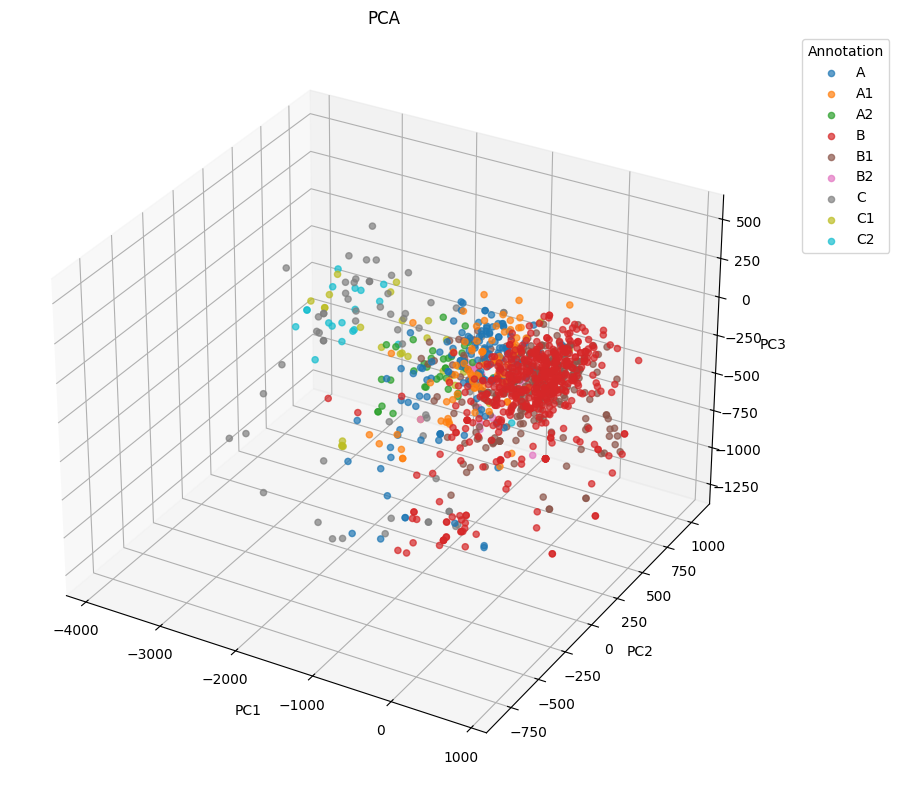

In [71]:

pca = PCA(n_components=3)
pca_components = pca.fit_transform(embeddings_np)


annotations = xiang_filtered['new_kr'].values
#annotations = xiang_filtered['Annotation'].values
unique_annotations = np.unique(annotations)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_annotations)))
color_map = dict(zip(unique_annotations, colors))


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for ann in unique_annotations:
    idx = annotations == ann
    ax.scatter(pca_components[idx, 0], pca_components[idx, 1], pca_components[idx, 2], 
               color=color_map[ann], label=ann, alpha=0.7, s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA')
ax.legend(title='Annotation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [72]:
import plotly.express as px
import pandas as pd


df_plot = pd.DataFrame({
    'PC1': pca_components[:, 0],
    'PC2': pca_components[:, 1],
    'PC3': pca_components[:, 2],
    'Annotation': annotations
})


fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', color='Annotation',
                    title='PCA',
                    opacity=0.5, size_max=5)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [73]:
fig.write_html('pca_3d.html')

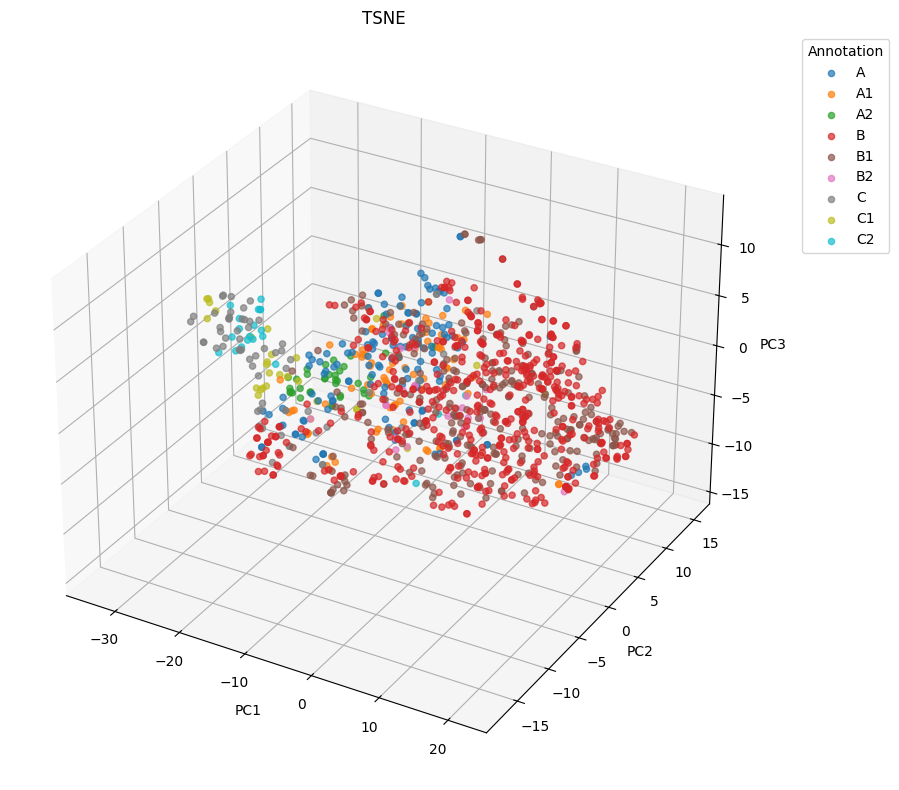

In [74]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3)
tsne_components = tsne.fit_transform(embeddings_np)


annotations = xiang_filtered['new_kr'].values
#annotations = xiang_filtered['Annotation'].values
unique_annotations = np.unique(annotations)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_annotations)))
color_map = dict(zip(unique_annotations, colors))


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for ann in unique_annotations:
    idx = annotations == ann
    ax.scatter(tsne_components[idx, 0], tsne_components[idx, 1], tsne_components[idx, 2], 
               color=color_map[ann], label=ann, alpha=0.7, s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('TSNE')
ax.legend(title='Annotation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
import plotly.express as px
import pandas as pd


df_plot = pd.DataFrame({
    'PC1': tsne_components[:, 0],
    'PC2': tsne_components[:, 1],
    'PC3': tsne_components[:, 2],
    'Annotation': annotations
})


fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', color='Annotation',
                    title='TSNE',
                    opacity=0.5, size_max=5)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

We are running t-SNE


In [76]:
fig.write_html('tsne_3d.html')